## Linear Support Vector Machines

using dataset:
    
    ex6data1.mat - Example Dataset 1
    
    ex6data2.mat - Example Dataset 2
    
    ex6data3.mat - Example Dataset 3
    
    spamTrain.mat - Spam training set
    
    spamTest.mat - Spam test set
    
    emailSample1.txt - Sample email 1
    
    emailSample2.txt - Sample email 2
    
    spamSample1.txt - Sample spam 1
    
    spamSample2.txt - Sample spam 2
    
    vocab.txt - Vocabulary list

In this part,you will be using support vector machines $(SVMs)$ with various examples 2D datasets.

And use Gaussian kernel with $SVMs$ to build a spam classifer

### 1.1 Example Dataset 1

2D example (ex6data1.mat) dataset which can be separated by a linear boundary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
dataSet1=loadmat('ex6data1.mat')

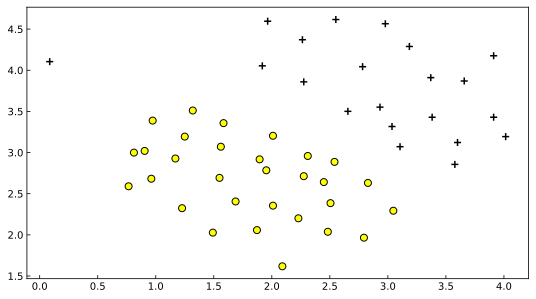

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

def plotData(dataSet):
    
    data=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data['y']=dataSet.get('y')
    
    positive=data[data['y'].isin([0])]
    negative=data[data['y'].isin([1])]
    
    plt.figure(figsize=(9,5))
    plt.tick_params(direction='in',labelsize=10)

    plt.scatter(positive['X1'],positive['X2'],c='yellow',s=50,marker='o',edgecolors='black')
    plt.scatter(negative['X1'],negative['X2'],c='black',s=50,marker='+')
plotData(dataSet1)

In [4]:
def find_decision_boundary(svc,x1min,x1max,x2min,x2max,diff):
    x1=np.linspace(x1min,x1max,1000)
    x2=np.linspace(x2min,x2max,1000)
    
    cordinates=[(x,y) for x in x1 for y in x2]
    
    x_cord,y_cord=zip(*cordinates)
    
    c_val=pd.DataFrame({'x1':x_cord,'x2':y_cord})
    c_val['svc_val']=svc.decision_function(c_val[['x1','x2']])
    
    decision=c_val[np.abs(c_val['svc_val'])<diff]
    
    return decision.x1,decision.x2

#### 1.1.1 Try C=1

use sklearn to compute param

In [5]:
from sklearn.svm import LinearSVC

In [6]:
def LinearSVM(dataSet,C=1):
    
    data=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data['y']=dataSet.get('y')
    
    svc1=LinearSVC(C=C,loss='hinge')
    svc1.fit(data[['X1','X2']],data['y'])
    score=svc1.score(data[['X1','X2']],data['y'])
    
    print('LinearSVM Scores:{}'.format(score))
    
    data['SVM Confidence']=svc1.decision_function(data[['X1','X2']])
    
    return data,svc1

In [7]:
dataSvc1,svc1=LinearSVM(dataSet1,1)

LinearSVM Scores:0.9803921568627451


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
dataSvc1

,X1,X2,y,SVM Confidence
0,1.964300,4.5957,1,0.800035
1,2.275300,3.8589,1,0.381795
2,2.978100,4.5651,1,1.373873
3,2.932000,3.5519,1,0.518890
4,3.577200,2.8560,1,0.331472
5,4.015000,3.1937,1,0.865964
6,3.381400,3.4291,1,0.684020
7,3.911300,4.1761,1,1.607300
8,2.782200,4.0431,1,0.831700
9,2.551800,4.6162,1,1.163810


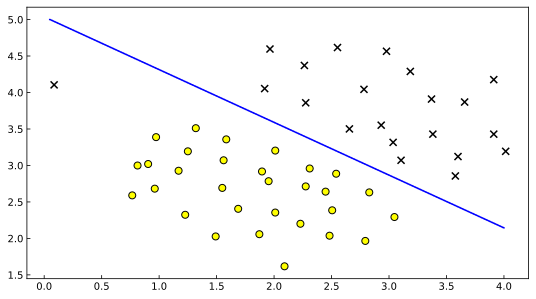

In [9]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
x1,x2=find_decision_boundary(svc1,0,4,1.5,5,2*10**-3)

def plotData(dataSet,x1,x2):
    
    data=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data['y']=dataSet.get('y')
    
    positive=data[data['y'].isin([0])]
    negative=data[data['y'].isin([1])]
    
    plt.figure(figsize=(9,5))
    plt.tick_params(direction='in',labelsize=10)

    plt.scatter(positive['X1'],positive['X2'],c='yellow',s=50,marker='o',edgecolors='black')
    plt.scatter(negative['X1'],negative['X2'],c='black',s=50,marker='x')
    
    plt.plot(x1,x2,c='blue')
    
plotData(dataSet1,x1,x2)

#### 1.1.2 Try C=100

In [10]:
dataSvc100,svc100=LinearSVM(dataSet1,100)

LinearSVM Scores:0.9411764705882353


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


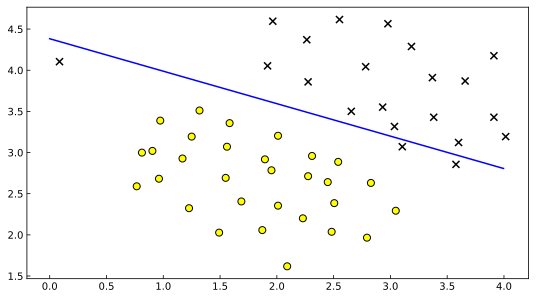

In [11]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
x1,x2=find_decision_boundary(svc100,0,4,1.5,5,2*10**-3)

def plotData(dataSet,x1,x2):
    
    data=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data['y']=dataSet.get('y')
    
    positive=data[data['y'].isin([0])]
    negative=data[data['y'].isin([1])]
    
    plt.figure(figsize=(9,5))
    plt.tick_params(direction='in',labelsize=10)

    plt.scatter(positive['X1'],positive['X2'],c='yellow',s=50,marker='o',edgecolors='black')
    plt.scatter(negative['X1'],negative['X2'],c='black',s=50,marker='x')
    
    plt.plot(x1,x2,c='blue')
    
plotData(dataSet1,x1,x2)